In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

#try:
    # %tensorflow_version only exists in Colab.
#    %tensorflow_version 2.x
#except Exception:
#    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"
from tensorflow import keras

# Common or useful imports
import numpy as np
import os
from scipy.io import arff
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
#%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [2]:
mnistdata='../Datasets/ARFFdata/fashionMNIST.arff'
data = arff.loadarff( mnistdata )
df = pd.DataFrame(data[0])

df.columns
XX=df.to_numpy()
print(np.shape(XX))
G=np.shape(XX)




(70000, 785)


In [3]:
X=XX[:,0: G[1]-1 ]
y=XX[:, G[1]-1 ]
print( np.sqrt( G[1]-1 ))
idim=np.sqrt( G[1]-1 ).astype(int)
print(idim)

28.0
28


In [4]:
X = np.reshape( X , ( G[0], idim, idim) ).astype(float)
y = y.astype(int)
print(np.shape(X))
print(np.shape(y))
print(y[0])


(70000, 28, 28)
(70000,)
9


In [5]:
X_train = X[0:60_000,:,:]
y_train = y[0:60_000]
X_test = X[60_000:,:,:]
y_test = y[60_000:]

In [6]:
print(np.shape(X_train))
print(np.shape(X_test))


(60000, 28, 28)
(10000, 28, 28)


In [7]:
X_valid, X_train1 = X_train[:5000] / 255., X_train[5000:] / 255.
y_valid, y_train1 = y_train[:5000], y_train[5000:]
X_test = X_test / 255.

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

X_train1


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

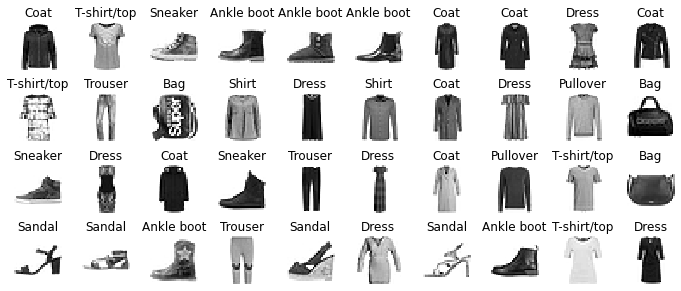

In [9]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train1[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train1[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


2023-02-06 15:57:25.529678: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [14]:
history = model.fit(X_train1, y_train1, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4393 - accuracy: 0.8455 - val_loss: 0.5310 - val_accuracy: 0.7986
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4126 - accuracy: 0.8567 - val_loss: 0.3922 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3941 - accuracy: 0.8617 - val_loss: 0.3754 - val_accuracy: 0.8676
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3754 - accuracy: 0.8676 - val_loss: 0.3719 - val_accuracy: 0.8712
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3635 - accuracy: 0.8713 - val_loss: 0.3615 - val_accuracy:

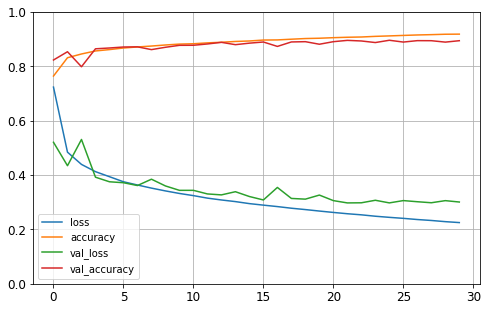

In [15]:

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()